# Linear regression project  
##### For the course 2022 Python Machine Learning & Data Science Masterclass

For this project, we use the Ames_Housing_Data dataset. This dataset has 81 features describring a range of characteristics of home in Ames sold between 2006 and 2010.

Over this jupyter notebook, I will deal with outliers and missing data, and provide a regression model to predict the sale value giving the home information.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Ames Housing Dataset

Let's first explore the dataset and the SalePrice.

In [3]:
ames_df = pd.read_csv("data/Ames_Housing_Data.csv")
ames_df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


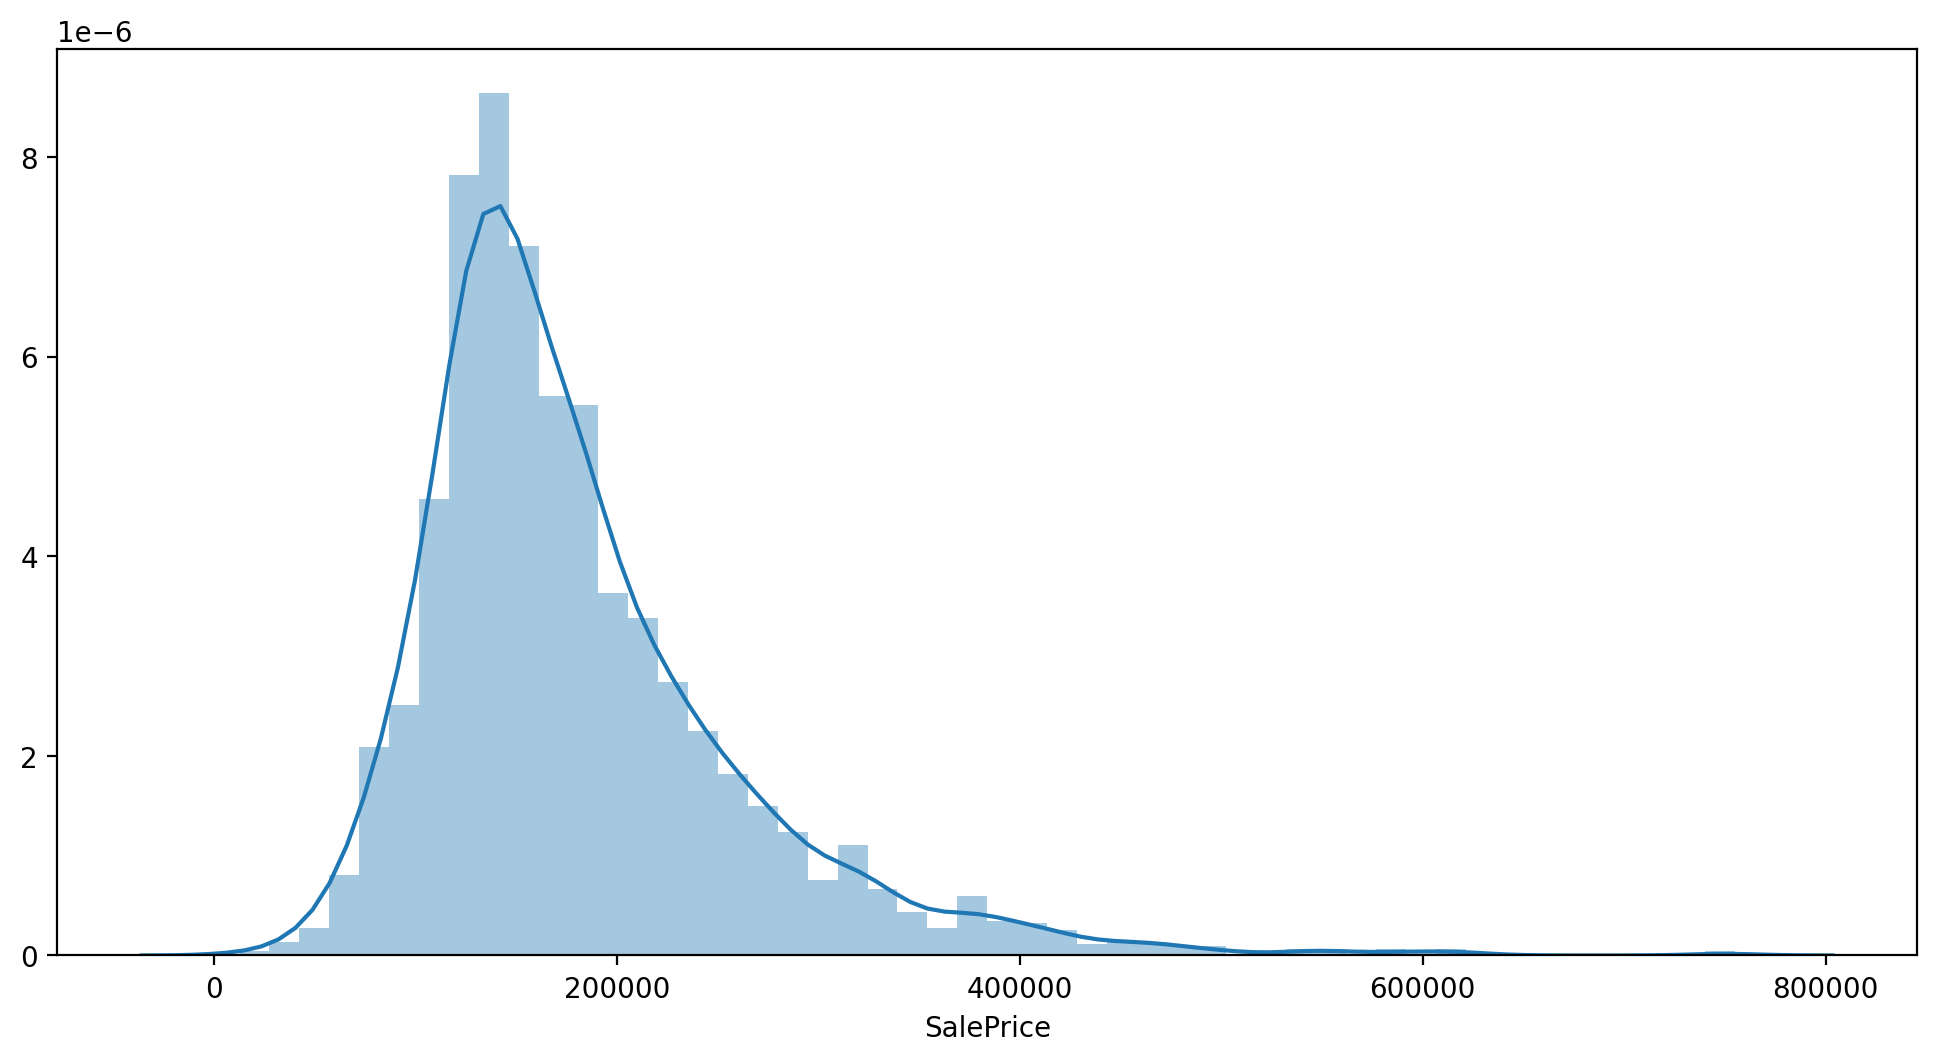

In [10]:
plt.figure(figsize=(12,6), dpi=200)
sns.distplot(ames_df["SalePrice"])

Let's start looking for outliers.

We can start by checking the features most correlated with *SalePrice*, and see if those that are apparently important in determining *SalePrice* show outliers.

In [13]:
ames_df.corr()["SalePrice"].sort_values()

PID               -0.246521
Enclosed Porch    -0.128787
Kitchen AbvGr     -0.119814
Overall Cond      -0.101697
MS SubClass       -0.085092
Low Qual Fin SF   -0.037660
Bsmt Half Bath    -0.035835
Yr Sold           -0.030569
Misc Val          -0.015691
BsmtFin SF 2       0.005891
3Ssn Porch         0.032225
Mo Sold            0.035259
Pool Area          0.068403
Screen Porch       0.112151
Bedroom AbvGr      0.143913
Bsmt Unf SF        0.182855
Lot Area           0.266549
2nd Flr SF         0.269373
Bsmt Full Bath     0.276050
Half Bath          0.285056
Open Porch SF      0.312951
Wood Deck SF       0.327143
Lot Frontage       0.357318
BsmtFin SF 1       0.432914
Fireplaces         0.474558
TotRms AbvGrd      0.495474
Mas Vnr Area       0.508285
Garage Yr Blt      0.526965
Year Remod/Add     0.532974
Full Bath          0.545604
Year Built         0.558426
1st Flr SF         0.621676
Total Bsmt SF      0.632280
Garage Area        0.640401
Garage Cars        0.647877
Gr Liv Area        0

We can see that *Overall Qual* seems to be pretty correlated with *SalePrice*. Let's check it with a plot, and see if we can identify any outliers.

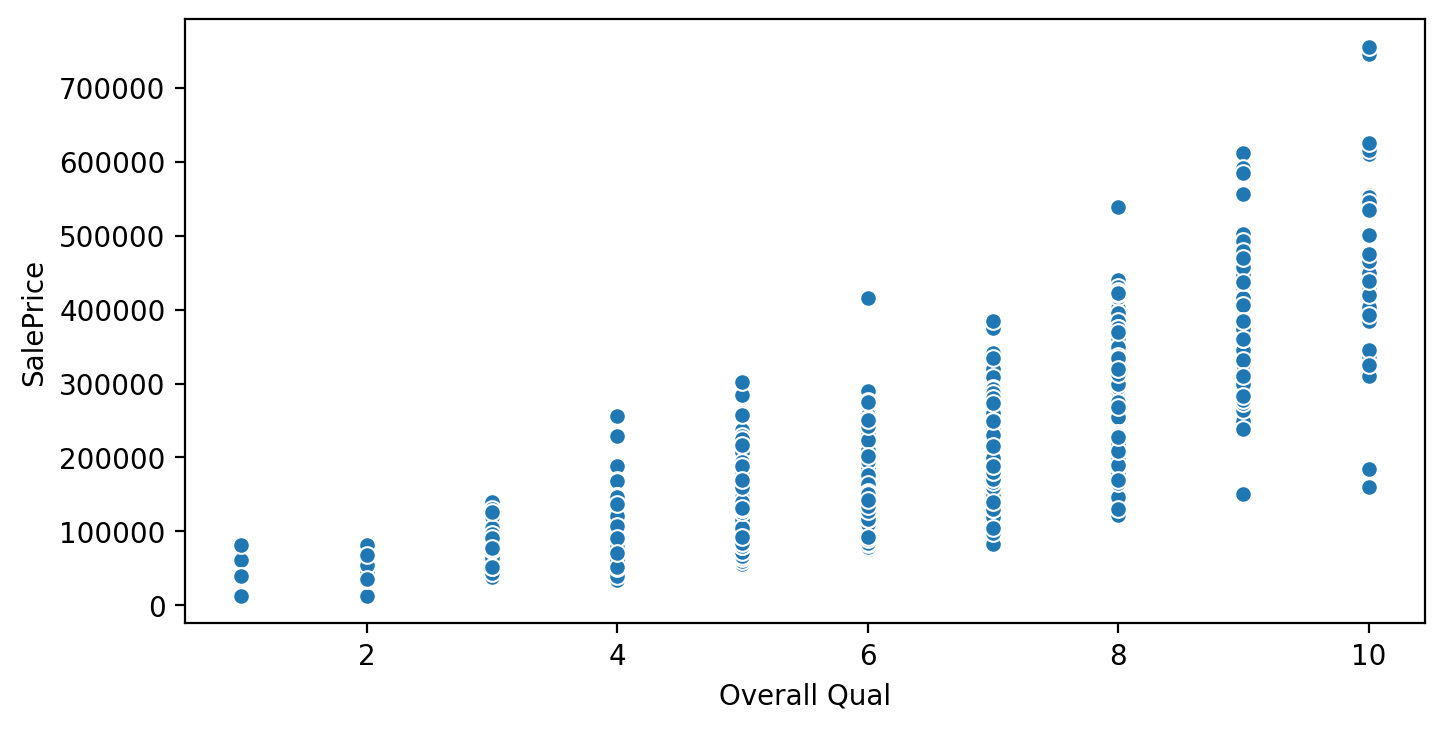

In [19]:
plt.figure(figsize=(8,4), dpi=200)
sns.scatterplot(data=ames_df, x='Overall Qual', y='SalePrice')

We can see some outliers were the *Overall Quality* is really good and the *Sale Price* is really high. And in this context, that makes sense. However, we can see other points were the *Overall Quality* is good, but the *Sale Price* is significally lower. Those points seems outliers in this context. Let's check them.

To do this, we selected those homes with *Overall Qual* greater than 8, whose *Sale Price* was less than 200000.

In [24]:
ames_df[(ames_df['Overall Qual'] > 8) & (ames_df['SalePrice'] < 200000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1182,533350090,60,RL,NaN,24572,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Family,150000
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


We cannot say much more about those points right now, so let's see another highly correlated feature to *SalePrice*, maybe this can help us.

*Gr Liv Area* is the second highest correlated feature to *SalePrice*.

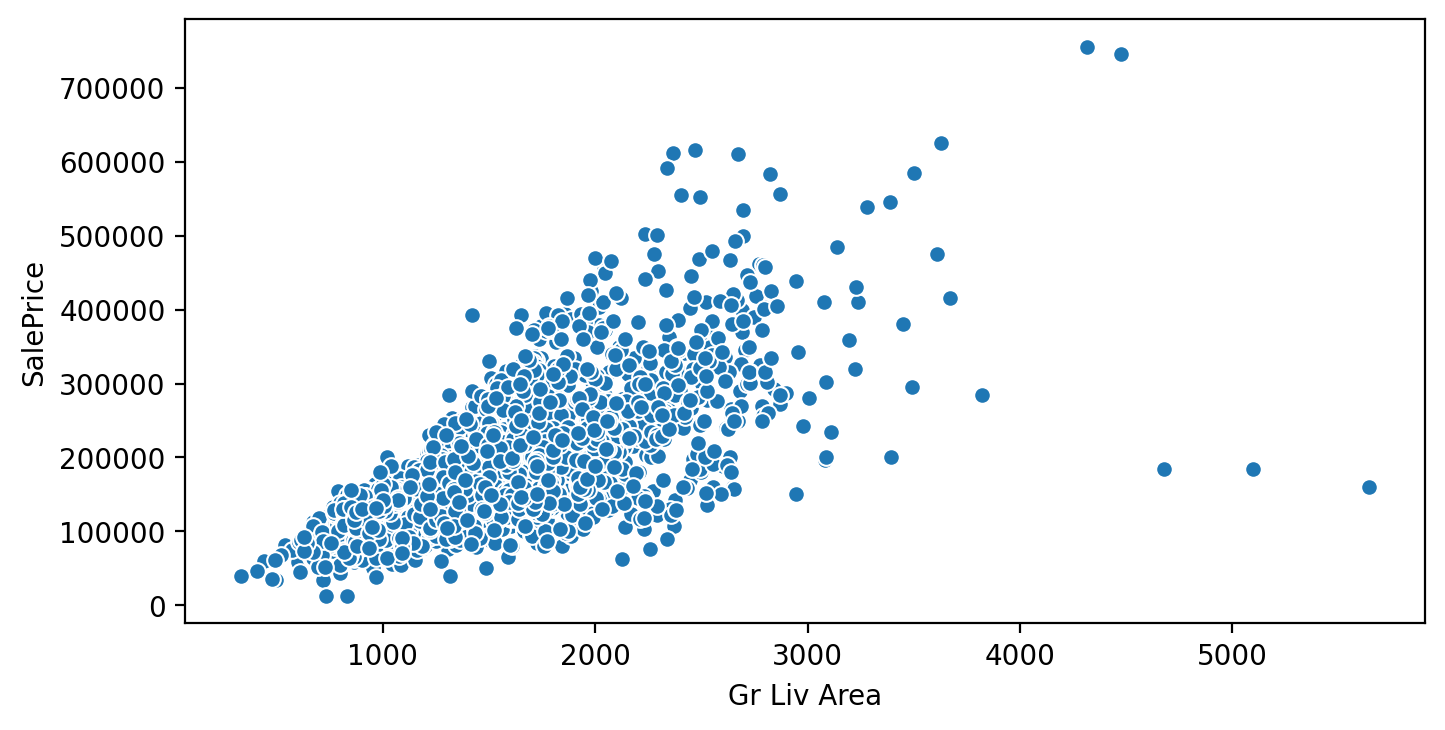

In [25]:
plt.figure(figsize=(8,4), dpi=200)
sns.scatterplot(data=ames_df, x='Gr Liv Area', y='SalePrice')

We can see some outliers there, with a great living area, but low sale price. Probably, those are the same points we see earlier.

In [26]:
ames_df[(ames_df['Gr Liv Area'] > 4000) & (ames_df['SalePrice'] < 400000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


These are the same rows that we had already seen before. Let's get them out of the dataset and plot again.

In [27]:
indexes_to_remove = ames_df[(ames_df['Gr Liv Area'] > 4000) & (ames_df['SalePrice'] < 400000)].index
ames_df = ames_df.drop(indexes_to_remove, axis=0)

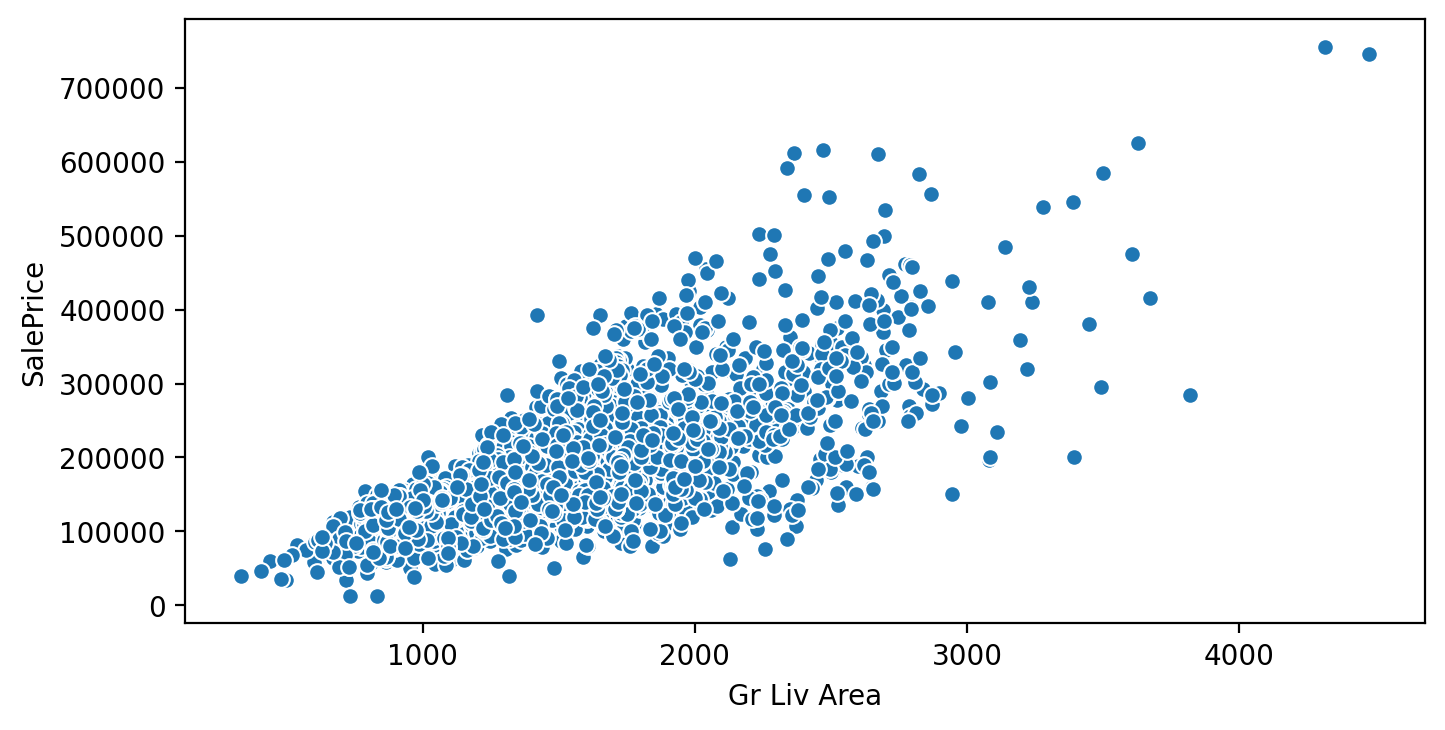

In [28]:
plt.figure(figsize=(8,4), dpi=200)
sns.scatterplot(data=ames_df, x='Gr Liv Area', y='SalePrice')

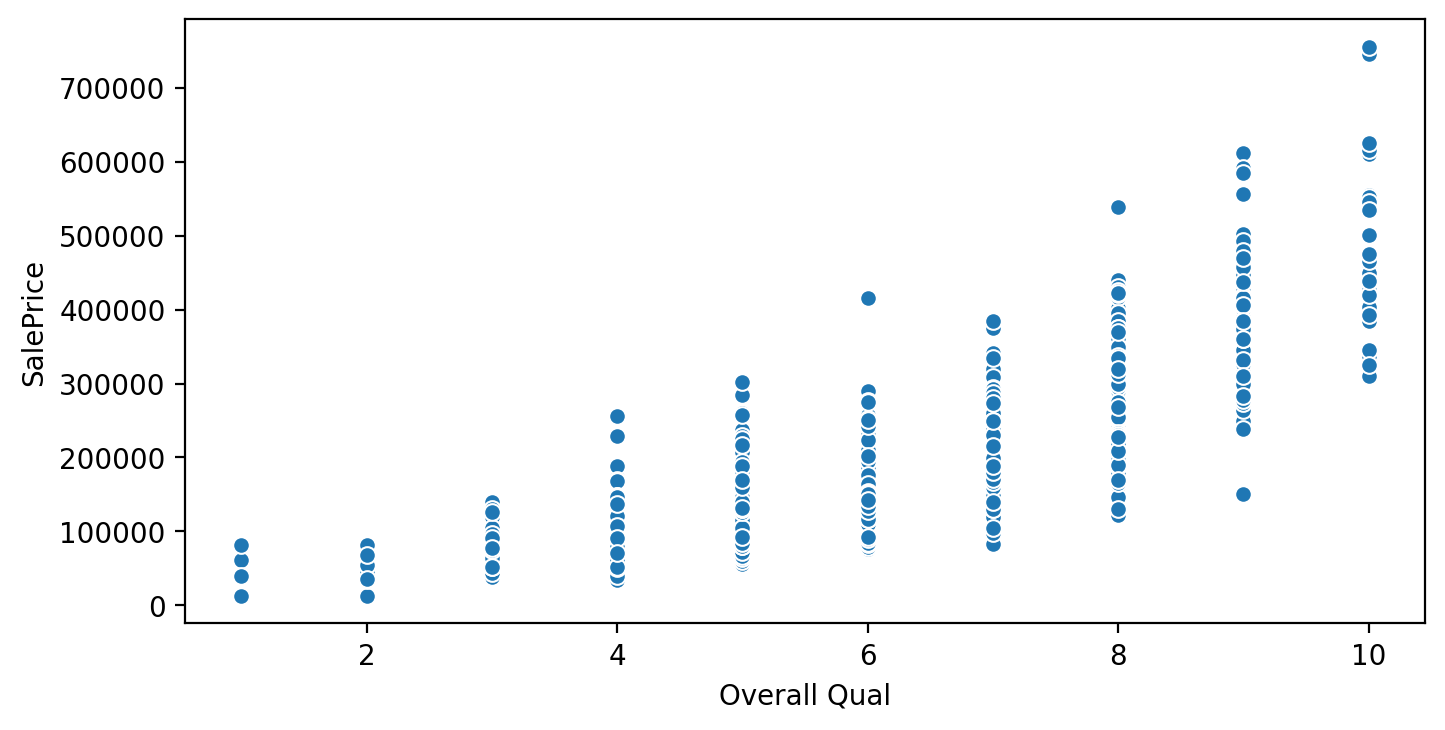

In [29]:
plt.figure(figsize=(8,4), dpi=200)
sns.scatterplot(data=ames_df, x='Overall Qual', y='SalePrice')

In [30]:
ames_df.to_csv("data/Ames_outliers_removed.csv", index = False)

## Exploring a little further

Let's look a little more at the information in the dataset to evaluate the unnecessary and missing data.

In [31]:
ames_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2927 entries, 0 to 2929
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2927 non-null   int64  
 1   MS SubClass      2927 non-null   int64  
 2   MS Zoning        2927 non-null   object 
 3   Lot Frontage     2437 non-null   float64
 4   Lot Area         2927 non-null   int64  
 5   Street           2927 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2927 non-null   object 
 8   Land Contour     2927 non-null   object 
 9   Utilities        2927 non-null   object 
 10  Lot Config       2927 non-null   object 
 11  Land Slope       2927 non-null   object 
 12  Neighborhood     2927 non-null   object 
 13  Condition 1      2927 non-null   object 
 14  Condition 2      2927 non-null   object 
 15  Bldg Type        2927 non-null   object 
 16  House Style      2927 non-null   object 
 17  Overall Qual  

In [33]:
with open('data/Ames_Housing_Feature_Description.txt','r') as f: 
    print(f.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

We can drop the PID column since we already have an index, and it won't add anything to the model.

In [34]:
ames_df = ames_df.drop("PID", axis=1)
ames_df

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,20,RL,NaN,8885,Pave,NaN,IR1,Low,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


## Looking for NaN values

Now we will search for NaN values and evaluate what we can do.

In [35]:
ames_df.isnull()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
3,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,True,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,False,False,False,False,False,True,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
2926,False,False,True,False,False,True,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
2927,False,False,False,False,False,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2928,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False


In [36]:
ames_df.isnull().sum()

MS SubClass         0
MS Zoning           0
Lot Frontage      490
Lot Area            0
Street              0
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 80, dtype: int64

We can make it easier to identify NaN values by calculating the percentage of NaN values in each column.

In [69]:
def percentage_of_missing_values(df):
    percentage_nan = 100 * df.isnull().sum() / len(df)
    percentage_nan = percentage_nan[percentage_nan > 0].sort_values()
    return percentage_nan

percentage_nan = percentage_of_missing_values(ames_df)
percentage_nan

Electrical         0.034165
Garage Area        0.034165
Total Bsmt SF      0.034165
Bsmt Unf SF        0.034165
BsmtFin SF 1       0.034165
BsmtFin SF 2       0.034165
Garage Cars        0.034165
Bsmt Full Bath     0.068329
Bsmt Half Bath     0.068329
Mas Vnr Area       0.785787
Mas Vnr Type       0.785787
BsmtFin Type 1     2.733174
Bsmt Qual          2.733174
Bsmt Cond          2.733174
BsmtFin Type 2     2.767339
Bsmt Exposure      2.835668
Garage Type        5.363854
Garage Finish      5.432183
Garage Qual        5.432183
Garage Cond        5.432183
Garage Yr Blt      5.432183
Lot Frontage      16.740690
Fireplace Qu      48.582166
Fence             80.457807
Alley             93.235395
Misc Feature      96.412709
Pool QC           99.590024
dtype: float64

Let's plot the missing values to facilitate its identification.

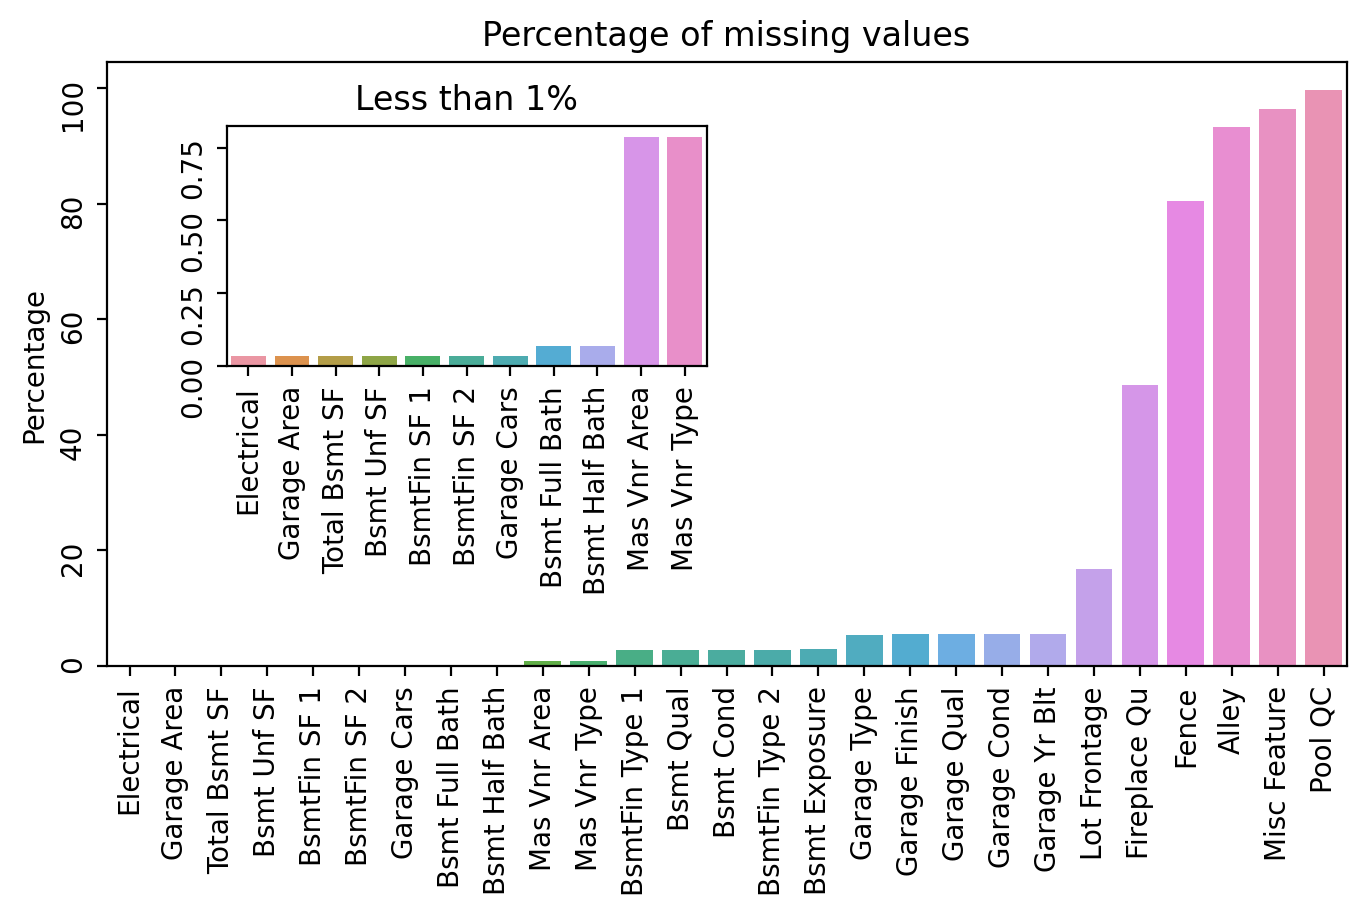

In [83]:
fig, ax = plt.subplots(figsize=(8,4), dpi=200)
sns.barplot(x=percentage_nan.index, y=percentage_nan, ax=ax)

ax.set_ylabel('Percentage')

less_than_one_percent = percentage_nan[percentage_nan < 1]
ax2 = plt.axes([0.2, 0.5, .3, .3])
sns.barplot(x=less_than_one_percent.index, y=less_than_one_percent, ax=ax2)

ax.set_title('Percentage of missing values')
ax.tick_params(labelrotation=90)

ax2.set_title('Less than 1%')
ax2.tick_params(labelrotation=90)

We can see that there are some columns that have a very low percentage of missing values. 

In [74]:
percentage_nan[percentage_nan < 1]

Electrical        0.034165
Garage Area       0.034165
Total Bsmt SF     0.034165
Bsmt Unf SF       0.034165
BsmtFin SF 1      0.034165
BsmtFin SF 2      0.034165
Garage Cars       0.034165
Bsmt Full Bath    0.068329
Bsmt Half Bath    0.068329
Mas Vnr Area      0.785787
Mas Vnr Type      0.785787
dtype: float64

In [76]:
# checking how much 0.034165 means... just one row
ames_df[ames_df['Total Bsmt SF'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000


In [78]:
# checking how much 0.068329 means... just two rows
ames_df[ames_df['Bsmt Half Bath'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


In [79]:
# checking how much 0.785787 means... Here we have too much rows to drop them. 
ames_df[ames_df['Mas Vnr Type'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
55,60,RL,NaN,7851,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,216500
484,60,RL,NaN,12891,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,257500
517,20,FV,90.0,7993,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,10,2009,New,Partial,225000
538,20,RL,67.0,10083,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2009,WD,Normal,184900
867,60,RL,70.0,8749,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,11,2009,WD,Normal,198500
1095,60,RL,NaN,7750,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2008,WD,Normal,176000
1119,20,RL,87.0,10037,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,8,2008,WD,Normal,247000
1122,20,FV,95.0,11639,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,12,2008,New,Partial,182000
1127,60,FV,65.0,8125,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,205950
1184,60,FV,NaN,7500,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2008,WD,Normal,205000


We can see that we have several features related to Basement that have NaN values. Looking at the information in the columns, we know that those rows with NaN values are related to houses without basements. 

We can fill in the missing values accordingly. We have two types of columns, those with numerical values and those with string ones. We will fill the numerical columns with zero and the string ones with None.

In [84]:
# Numerical basement columns
bsmt_numerical_cols = ['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF','Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath']
ames_df[bsmt_numerical_cols] = ames_df[bsmt_numerical_cols].fillna(0)

In [85]:
# String basement columns
bsmt_string_cols =  ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']
ames_df[bsmt_string_cols] = ames_df[bsmt_string_cols].fillna("None")

In [86]:
percentage_nan = percentage_of_missing_values(ames_df)
percentage_nan

Electrical        0.034165
Garage Cars       0.034165
Garage Area       0.034165
Mas Vnr Type      0.785787
Mas Vnr Area      0.785787
Garage Type       5.363854
Garage Yr Blt     5.432183
Garage Finish     5.432183
Garage Qual       5.432183
Garage Cond       5.432183
Lot Frontage     16.740690
Fireplace Qu     48.582166
Fence            80.457807
Alley            93.235395
Misc Feature     96.412709
Pool QC          99.590024
dtype: float64

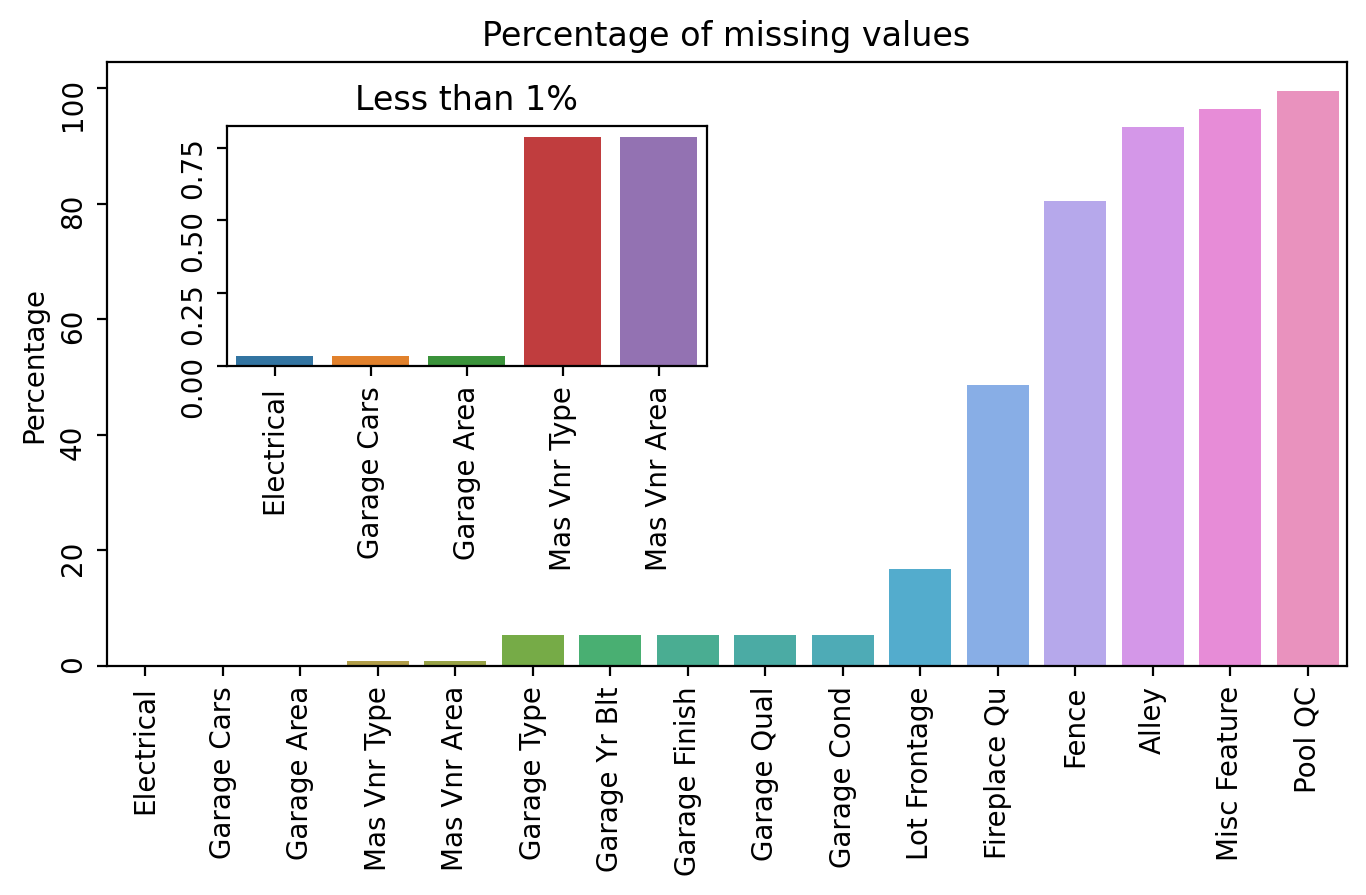

In [88]:
fig, ax = plt.subplots(figsize=(8,4), dpi=200)
sns.barplot(x=percentage_nan.index, y=percentage_nan, ax=ax)

ax.set_ylabel('Percentage')

less_than_one_percent = percentage_nan[percentage_nan < 1]
ax2 = plt.axes([0.2, 0.5, .3, .3])
sns.barplot(x=less_than_one_percent.index, y=less_than_one_percent, ax=ax2)

ax.set_title('Percentage of missing values')
ax.tick_params(labelrotation=90)

ax2.set_title('Less than 1%')
ax2.tick_params(labelrotation=90)

We already now that some of these features have just one or two rows with NaN values. Let's drop those rows.

In [89]:
ames_df = ames_df.dropna(axis=0, subset=['Electrical','Garage Cars'])

In [90]:
percentage_nan = percentage_of_missing_values(ames_df)
percentage_nan

Mas Vnr Type      0.786325
Mas Vnr Area      0.786325
Garage Type       5.367521
Garage Yr Blt     5.401709
Garage Finish     5.401709
Garage Qual       5.401709
Garage Cond       5.401709
Lot Frontage     16.752137
Fireplace Qu     48.547009
Fence            80.478632
Alley            93.230769
Misc Feature     96.410256
Pool QC          99.589744
dtype: float64

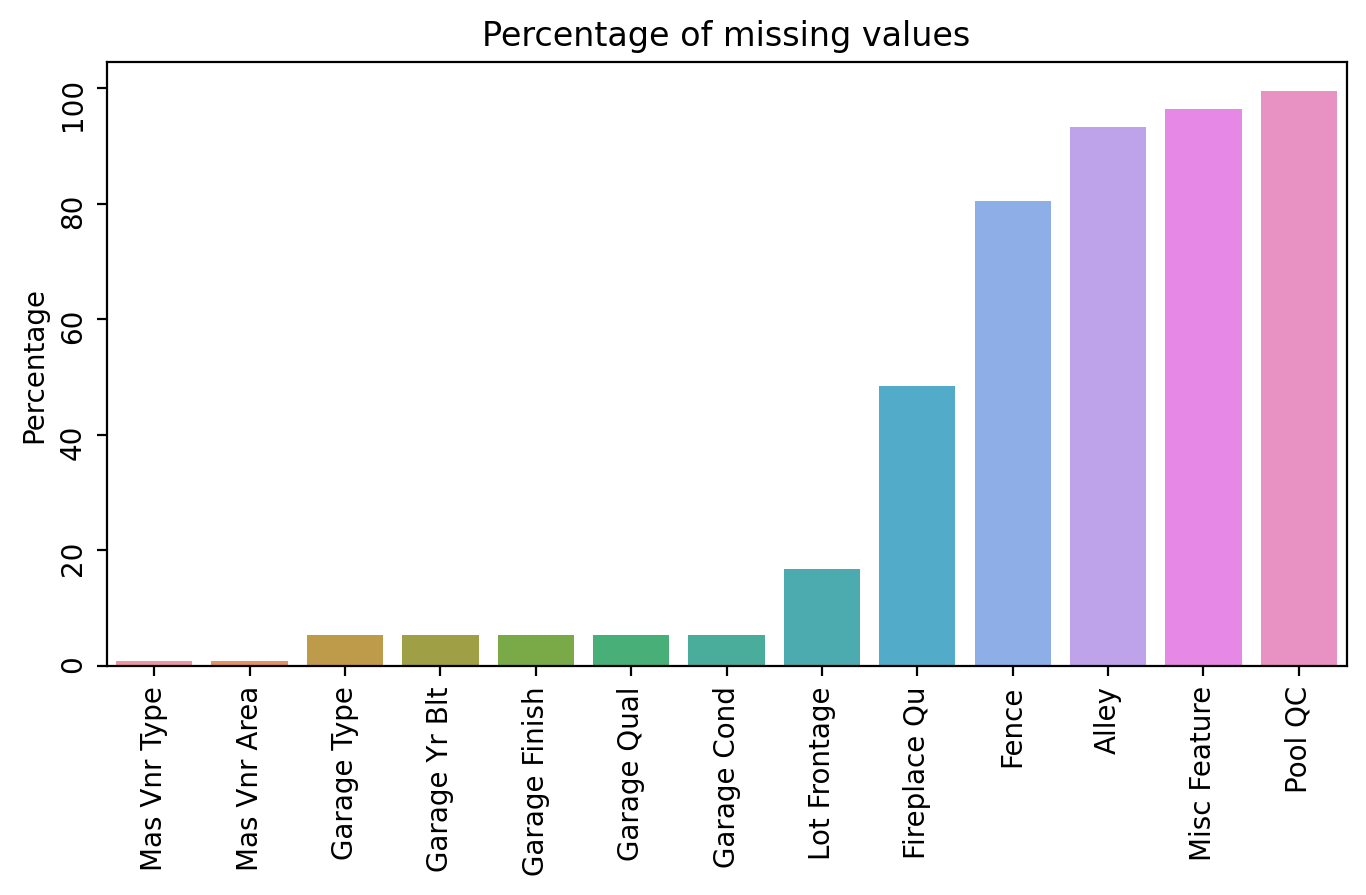

In [92]:
fig, ax = plt.subplots(figsize=(8,4), dpi=200)
sns.barplot(x=percentage_nan.index, y=percentage_nan, ax=ax)

ax.set_ylabel('Percentage')
ax.set_title('Percentage of missing values')
ax.tick_params(labelrotation=90)

Based on the description text file, if *Mas Vnr Type* and *Mas Vnr Area* have missing values, the house probably simply does not have masonry veneer. In this case, we will fill in this data as we did before.

In [93]:
ames_df["Mas Vnr Type"] = ames_df["Mas Vnr Type"].fillna("None")
ames_df["Mas Vnr Area"] = ames_df["Mas Vnr Area"].fillna(0)

<ipython-input-93-936504d8ab6c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ames_df["Mas Vnr Type"] = ames_df["Mas Vnr Type"].fillna("None")
<ipython-input-93-936504d8ab6c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ames_df["Mas Vnr Area"] = ames_df["Mas Vnr Area"].fillna(0)


In [94]:
percentage_nan = percentage_of_missing_values(ames_df)
percentage_nan

Garage Type       5.367521
Garage Yr Blt     5.401709
Garage Finish     5.401709
Garage Qual       5.401709
Garage Cond       5.401709
Lot Frontage     16.752137
Fireplace Qu     48.547009
Fence            80.478632
Alley            93.230769
Misc Feature     96.410256
Pool QC          99.589744
dtype: float64

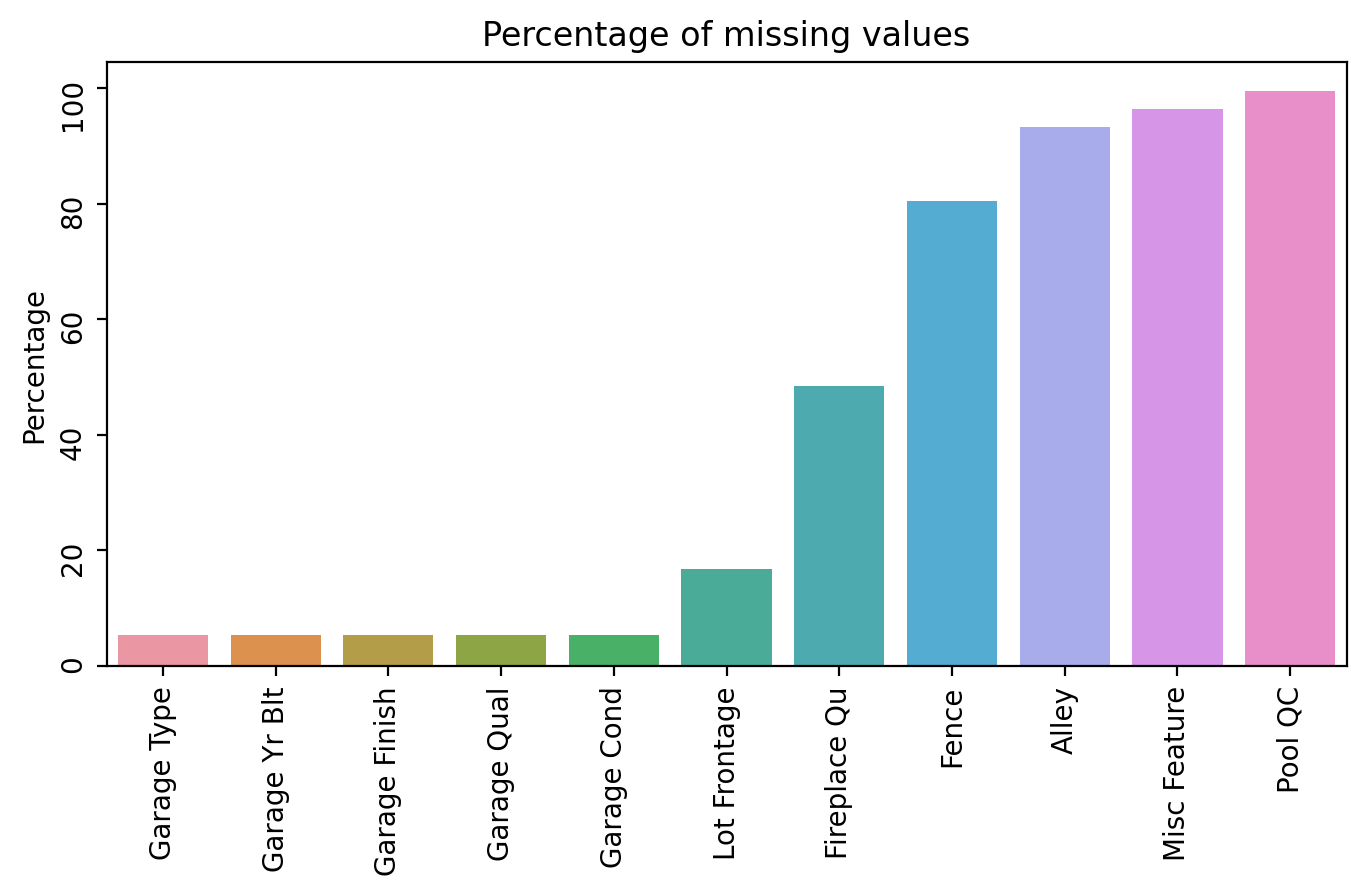

In [95]:
fig, ax = plt.subplots(figsize=(8,4), dpi=200)
sns.barplot(x=percentage_nan.index, y=percentage_nan, ax=ax)

ax.set_ylabel('Percentage')
ax.set_title('Percentage of missing values')
ax.tick_params(labelrotation=90)

Let us now take a closer look at the garage-related features.

In [96]:
ames_df[['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']]

,Garage Type,Garage Finish,Garage Qual,Garage Cond
0,Attchd,Fin,TA,TA
1,Attchd,Unf,TA,TA
2,Attchd,Unf,TA,TA
3,Attchd,Fin,TA,TA
4,Attchd,Fin,TA,TA
...,...,...,...,...
2925,Detchd,Unf,TA,TA
2926,Attchd,Unf,TA,TA
2927,NaN,NaN,NaN,NaN
2928,Attchd,RFn,TA,TA


Again, based on the description text file, any missing values in these columns probably mean that the houses do not have a garage. Let's fill in the values.

In [97]:
garage_string_cols = ['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']
ames_df[garage_string_cols] = ames_df[garage_string_cols].fillna('None')

ames_df['Garage Yr Blt'] = ames_df['Garage Yr Blt'].fillna(0)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
<ipython-input-97-b34e65bb0387>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ames_df['Garage Yr Blt'] = ames_df['Garage Yr Blt'].fillna(0)


In [98]:
percentage_nan = percentage_of_missing_values(ames_df)
percentage_nan

Lot Frontage    16.752137
Fireplace Qu    48.547009
Fence           80.478632
Alley           93.230769
Misc Feature    96.410256
Pool QC         99.589744
dtype: float64

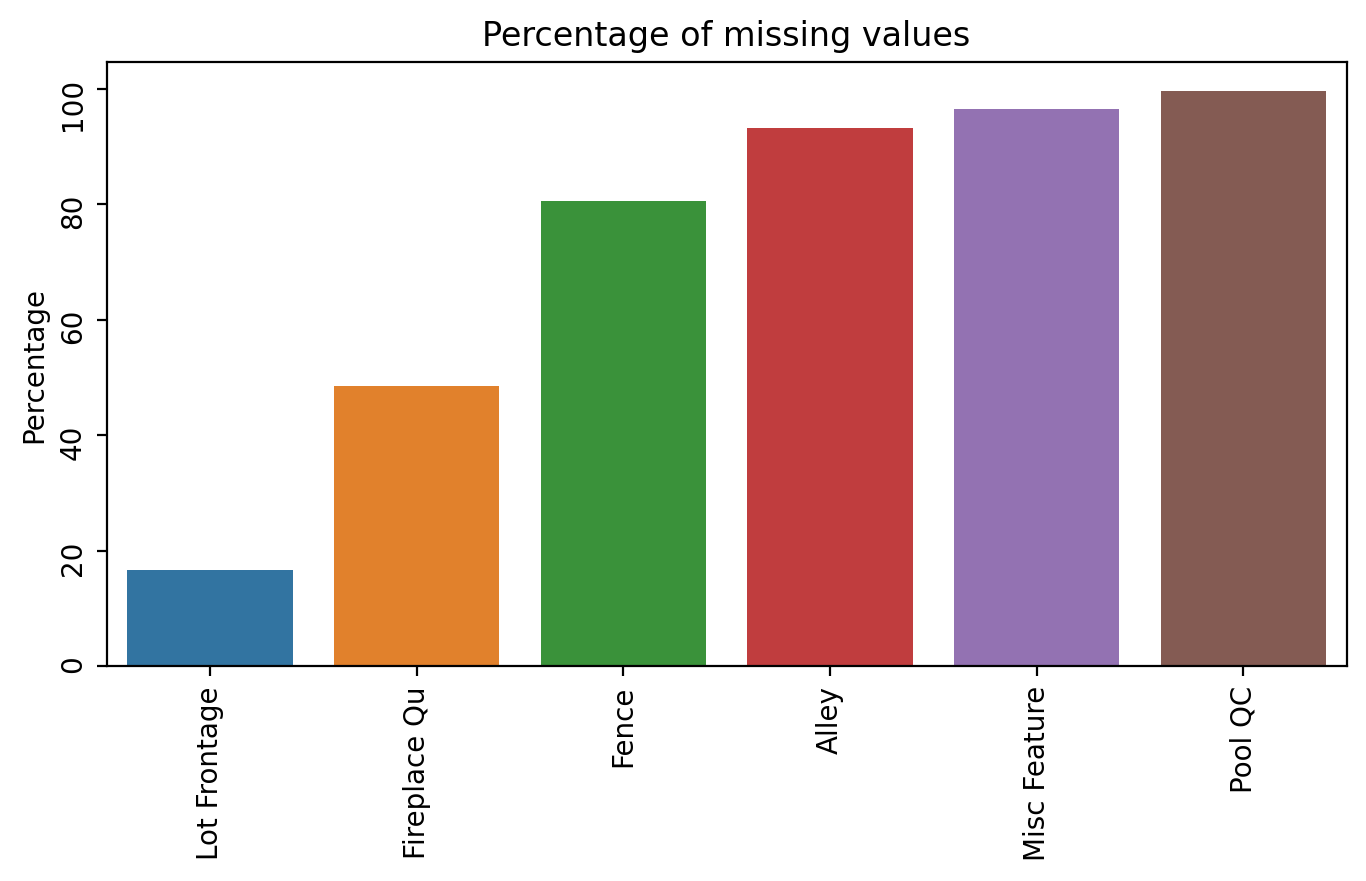

In [103]:
fig, ax = plt.subplots(figsize=(8,4), dpi=200)
sns.barplot(x=percentage_nan.index, y=percentage_nan, ax=ax)

ax.set_ylabel('Percentage')
ax.set_title('Percentage of missing values')
ax.tick_params(labelrotation=90)

Based on the feature description text file, missing values mean that the house does not have certain features, such as a pool or alley access. Let's fill in these values accordingly.

In [104]:
with open('data/Ames_Housing_Feature_Description.txt','r') as f: 
    print(f.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [105]:
string_cols = ['Pool QC', 'Misc Feature', 'Alley', 'Fence', 'Fireplace Qu']
ames_df[string_cols] = ames_df[string_cols].fillna('None')

In [106]:
percentage_nan = percentage_of_missing_values(ames_df)
percentage_nan

Lot Frontage    16.752137
dtype: float64

Now let's try to fill in values for the NaN in *Lot Frontage*.

In this case, we need to decide what other filled feature is likely to be related and correlated to *Lot Frontage*. We will assume that this characteristic is related to the neighborhood in which a house is located. Then we will use: 

- *Neighborhood: Physical locations within Ames city limits.*
- *LotFrontage: Linear feet of street connected to property*


In [107]:
ames_df['Neighborhood'].unique()

array(['NAmes', 'Gilbert', 'StoneBr', 'NWAmes', 'Somerst', 'BrDale',
       'NPkVill', 'NridgHt', 'Blmngtn', 'NoRidge', 'SawyerW', 'Sawyer',
       'Greens', 'BrkSide', 'OldTown', 'IDOTRR', 'ClearCr', 'SWISU',
       'Edwards', 'CollgCr', 'Crawfor', 'Blueste', 'Mitchel', 'Timber',
       'MeadowV', 'Veenker', 'GrnHill', 'Landmrk'], dtype=object)

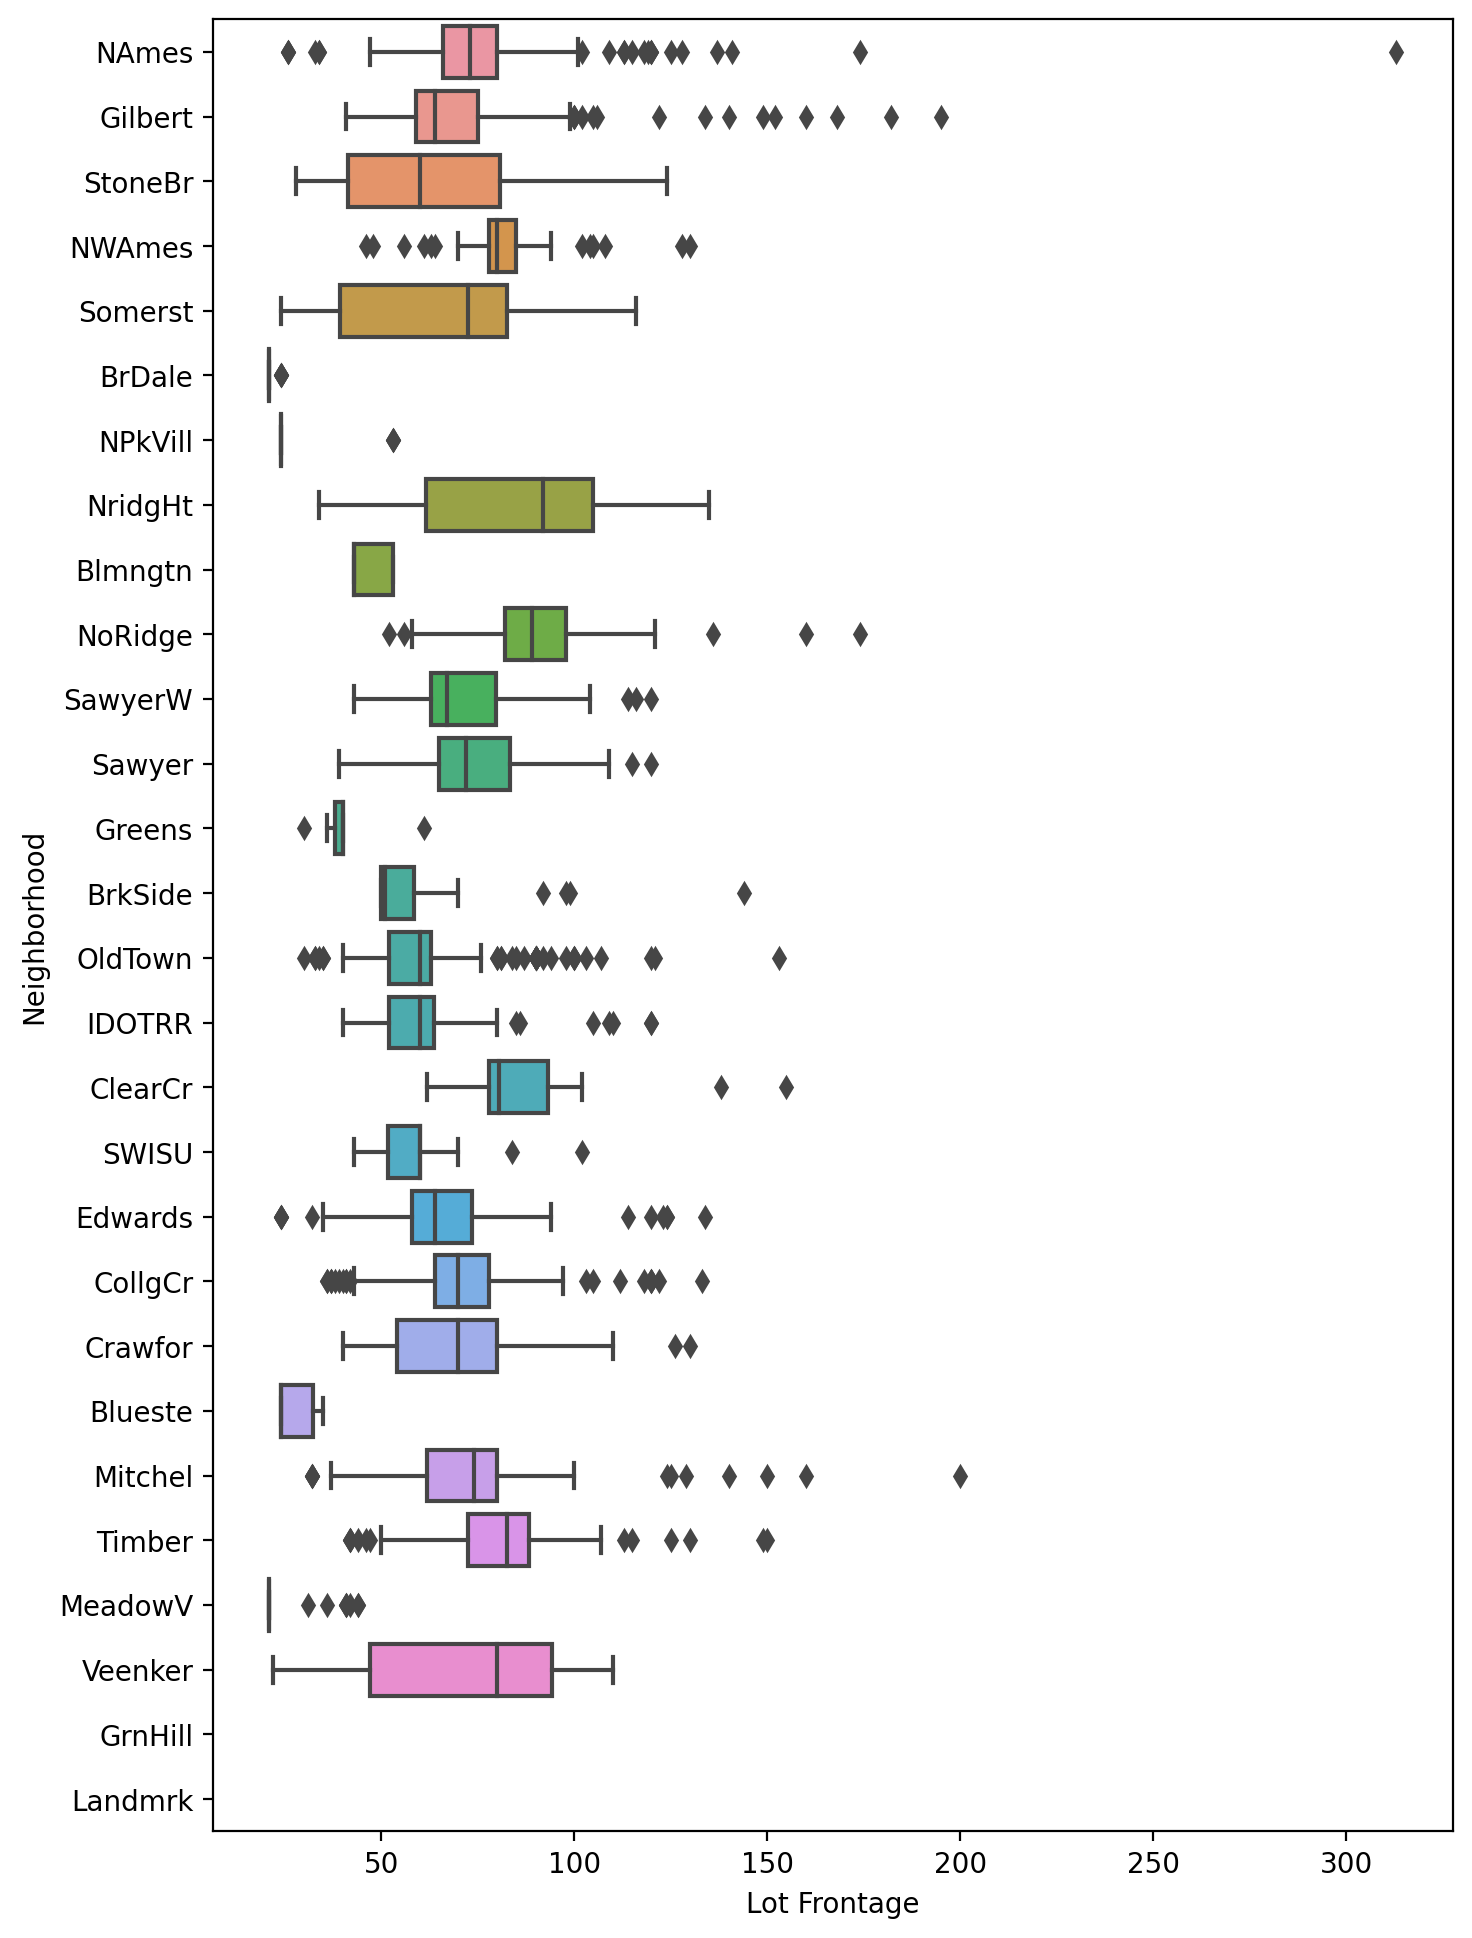

In [109]:
plt.figure(figsize=(8,12), dpi=200)
sns.boxplot(data=ames_df, x='Lot Frontage', y='Neighborhood', orient='h')

In the figure, we can observe that is some relation between the neighborhood and the lot frontage. We can use the mean value to fill the missing data. 

In [111]:
ames_df.groupby('Neighborhood')['Lot Frontage'].mean()

Neighborhood
Blmngtn    46.900000
Blueste    27.300000
BrDale     21.500000
BrkSide    55.789474
ClearCr    88.150000
CollgCr    71.336364
Crawfor    69.951807
Edwards    64.794286
Gilbert    74.207207
Greens     41.000000
GrnHill          NaN
IDOTRR     62.383721
Landmrk          NaN
MeadowV    25.606061
Mitchel    75.144444
NAmes      75.210667
NPkVill    28.142857
NWAmes     81.517647
NoRidge    91.629630
NridgHt    84.184049
OldTown    61.777293
SWISU      59.068182
Sawyer     74.551020
SawyerW    70.669811
Somerst    64.549383
StoneBr    62.173913
Timber     81.303571
Veenker    72.000000
Name: Lot Frontage, dtype: float64

In [114]:
ames_df['Lot Frontage'] = ames_df.groupby('Neighborhood')['Lot Frontage'].transform(lambda val: val.fillna(val.mean()))

<ipython-input-114-1a7c5235a577>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ames_df['Lot Frontage'] = ames_df.groupby('Neighborhood')['Lot Frontage'].transform(lambda val: val.fillna(val.mean()))


In [115]:
percentage_nan = percentage_of_missing_values(ames_df)
percentage_nan

Lot Frontage    0.102564
dtype: float64

Those missing values are related to the lack of information for the GrnHill and Landmrk neighborhoods. Let's fill those NaN with zeros.

In [116]:
ames_df['Lot Frontage'] = ames_df['Lot Frontage'].fillna(0)

<ipython-input-116-9f71ca894462>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ames_df['Lot Frontage'] = ames_df['Lot Frontage'].fillna(0)


In [117]:
percentage_nan = percentage_of_missing_values(ames_df)
percentage_nan

Series([], dtype: float64)

Now we have no more missing values. Let's save this dataframe to another file.

In [118]:
ames_df.to_csv("data/Ames_no_missing_data.csv",index=False)

In [ ]:
## LIENAR